# Gradient Descent for Linear Regression

Based on Andrew Ng lectures for the first week of his course on Machine Learning on Cousera I've tried to make a Python implementation of the Gradient Descent algorithm for linear regresssion. Along with Andrew Ng lectures I've got some ideas and clarification from MATT NEDRICH in his blog post. Below you can find links for Andrew Ng course and links for Matt's post and his repository for the problem.

Andrew Ng Course: https://www.coursera.org/learn/machine-learning/home/welcome

Matt's Blog Post:
https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

Matt's Github repository:
https://github.com/mattnedrich/GradientDescentExample

### Imports and Data Acquisition
Let's begin with some imports and data acquisition. I'll use Pandas to read the CSV file and store data in a dataframe. It's a very straightforward dataset and Pandas is much more powerful than the simple use I'm making here (I'm still learning it...). For simple visualization I'm using Matplotlib and Seaborn. I'm also importing stats from scipy to test our model against the its linear regression module. 

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acquiring Data
# Source: https://github.com/mattnedrich/GradientDescentExample
data = pd.read_csv('data_single_var.csv')
data = data.sort_values(by=['x'])
data['index'] = [i for i in range(len(data['x']))]
data.set_index('index', inplace=True)

In [2]:
# Showing the first 10 entries of 100 in the dataset
data.head(10)

,x,y
index,,
0,25.128485,53.454394
1,31.588117,50.392670
2,32.502345,31.707006
3,32.669044,45.570589
4,32.940480,67.170656
5,33.093832,50.719589
6,33.644706,69.899682
7,33.864215,52.725494
8,34.333125,55.723489


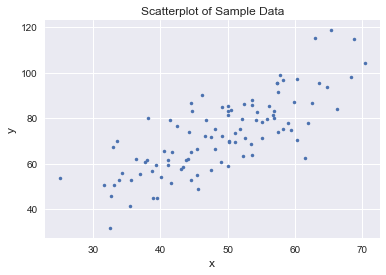

In [3]:
# Ploting data as a scatterplot
plt.plot(data['x'], data['y'], '.') 
plt.title('Scatterplot of Sample Data')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.show()

### Thinking about the problem
From the plot above it's possible to get an intuition of some linear behavior. Here the linear regression comes into play. Maybe it's possible to draw a line that model this linear bahavior of the data... but where the line will lie? Where it'll cross the y-axis? And what slope it'll have?

We can use the equation for a line in the plane:

$$y' = a + bx$$

Where $y'$ is the predicted value for a given $x$, $a$ is the y-intercept and $b$ is the slope of the line. From that we'll try to find the line that best fit the points we have.


### Linear Regression Intuition

Let's take a simpler example with fewer points for best visualization. Credits for the following images are at the end of this cell.

![Scatter](img/img1.png)

Here we can imagine a line crossing the plane that represents the data and allow us to predict values for $y$ given another values for $x$, as we can see in the next plot:

![Scatter_Line](img/img2.png)

If we think in a best fit line this line must have the least distance possible of all points. We can call the distance from the line to each point in our dataset the error $e_i$.

![Scatter_Line_Error](img/img3.png)

To have the best line means that the sum $e_1 + e_2 + e_3 + e_4$ get the minimum possible value.

We can say that:

$$TotalError = \sum_{i=1}^4 (y'_i - y_i)$$

To work only with positive values we can use the Squared Mean of the Total Error and call it our Cost Function J, dividing it by the size of our dataset, 4 in this case:

$$J = \frac{1}{4}\sum_{i=1}^4 (y'_i - y_i)^2$$

Now I'll generalize the cost function J for $m$ points in the dataset and divide it by 2 (magic number?). Also, I'll expand the $y'_i$ term and put the right notation for the J function:

$$J(a, b) = \frac{1}{2m}\sum_{i=1}^m (a + bx_i - y_i)^2$$

As we can see, the J cost function is expressed in terms of the parameters $a$ and $b$ we want to find from the beginning. Using our knowledge of differential calculus we can say that to find the minimum values for the J function we can differentiate this function with respect to its variables $a$ and $b$ of the function J and make use of the Gradient Descent algorithm to reach this minima. 


### The Gradient Vector

For one variable linear regression the J cost function will assume a bow shape, with only one minimum value for which the parameters $a$ and $b$ represent the best fit line for our dataset. The Gradient Descent method is a way to walk through the surface of the J function in the direction of its minima using the Gradient Vector as a guide to which direction to walk. Let's look the 3D plot of an example of bow shape function:

![J_Function](img/bowjfunction.png)


The 'Gradient' is a vector that represents the rate of change of a function at a given point. You can find a detailed explanation of the Gradient Vecton in vector Calculus here: https://betterexplained.com/articles/vector-calculus-understanding-the-gradient/. In our example we're dealing with a two variable J function and the rates of change of the function J will be given by it's partial derivarives:

The Gradient Vector, which gives the direction of greater increase in the function is:

$$\nabla J = (\frac{\partial}{\partial a}J, \frac{\partial}{\partial b}J)$$


Whose terms (partial derivatives) are:

$$\frac{\partial}{\partial a}J = \frac{1}{m}\sum_{i=1}^m (a + bx_i - y_i)$$

$$\frac{\partial}{\partial b}J = \frac{1}{m}\sum_{i=1}^m (a + bx_i - y_i)x_i$$

If you are interested in the details of the derivatives, check it here: https://matthewebmckenna.com/posts/2017/05/gradient-descent-linear-regression

If we start at the point $A$ of our bow function example and wants to go faster to $B$ we need to take the opposite direction of the gradient vector, or $-\nabla J$. When we reach $B$ the value for the gradient vector will be $(0, 0)$ because there is no rate of change at this point and we've reached the mininma of the function.

You can see below the Python implementation of the Cost Function J and its partial derivatives.

#### Credits:

Scatter plots:
http://www.sigmazone.com/LaBrea_Scatter.htm

Bow Shaped 3D Plot:
https://medium.com/abdullah-al-imran/intuition-of-gradient-descent-for-machine-learning-49e1b6b89c8b


In [4]:
#
# Cost Function and Partial Derivatives with respect to 'a' and 'b'
#

def cost_function(a, b, x_values, y_values):
    '''
    Calculates the square mean error for a given dataset
    with (x,y) pairs and the model y' = a + bx

    a: y-intercept for the model
    b: slope of the curve
    x_values, y_values: points (x,y) of the dataset
    '''
    data_len = len(x_values)
    total_error = sum([((a + b * x_values[i]) - y_values[i])**2
                       for i in range(data_len)])
    return total_error / (2 * float(data_len))


def a_gradient(a, b, x_values, y_values):
    '''
    Partial derivative of the cost_function with respect to 'a'

    a, b: values for 'a' and 'b'
    x_values, y_values: points (x,y) of the dataset
    '''
    data_len = len(x_values)
    a_gradient = sum([((a + b * x_values[i]) - y_values[i])
                      for i in range(data_len)])
    return a_gradient / float(data_len)


def b_gradient(a, b, x_values, y_values):
    '''
    Partial derivative of the cost_function with respect to 'b'

    a, b: values for 'a' and 'b'
    x_values, y_values: points (x,y) of the dataset
    '''
    data_len = len(x_values)
    b_gradient = sum([(((a + b * x_values[i]) - y_values[i]) * x_values[i])
                      for i in range(data_len)])
    return b_gradient / float(data_len)

### Gradient Descent Algorithm

Andrew Ng explains that we need a way to walk through the function in the direction of it's minima and we can use the Gradient Descent Algorithm to achive this.

The idea is to start at a given point in the function J choosing taking some value for $a$ and $b$, calculating the gradient vector at this point and giving a step in that direction. Then we take new values for the gradient vector at this new point and give another step... and so on, until we reach the minima of the function where the Gradient Vector is $\nabla J = (0, 0)$ and the function J have it's minimum value (the error is the minimum possible).

We can think as follows:

Repeat until convergence (partial derivatives are zero)

$$a := a - \alpha \frac{\partial}{\partial a}J$$

$$b := b - \alpha \frac{\partial}{\partial b}J$$

In the algorithm above we have the simbol $:=$ that means "evaluate the right side and make the left side equal it". It's an assignment statement and at each iteration we recalculate $a$ and $b$ and update its values.

The $\alpha$ in the equations is called the learning rate of the algorithm. It indicates the size of the steps we give in the direction of the minima of the function. It's worth to notice how the size of the step could be decisive for the success or failure of our implementation! If we take a very small step the algorithm could take too long to converge and this could have a high computational cost. On the other hand, if we take a big step our algorithm could just miss the minima point and completely diverge, never coming back again in the direction of the minima. Below you find a screenshot of Andrew's Ng lecture ilustrating this concept.

![Alpha_Parameter](img/alpha.png)

Another thing to notice is that we don't need to worry about giving smaller steps (decrease $\alpha$ value) along the way. As our algorithm runs the values of the partial derivatives get smaller and this already deacreses our steps as we get near the minima.

Now we can implement a function to give the steps we need to reach the minima of J cost function and another function to run our algorithm. See the code below and read the comments to understand its implementation (pay special attention to how I decide to stop the iterations and come up with the values for $a$ and $b$).

In [5]:
#
# Gradient Descent step implementation and Gradient Descent algorithm
#

def gradient_descent_step(a_current, b_current, x_values, y_values, alpha):
    '''
    Give a step in direction of the minimum of the cost_function using
    the 'a' and 'b' gradiants. Return new values for 'a' and 'b'.

    a_current, b_current: the current values for 'a' and 'b'
    x_values, y_values: points (x,y) of the dataset

    '''
    new_a = a_current - alpha * a_gradient(a_current, b_current, x_values, y_values)
    new_b = b_current - alpha * b_gradient(a_current, b_current, x_values, y_values)
    return (new_a, new_b)


def run_gradient_descent(a, b, x_values, y_values, alpha, precision, plot=False, verbose=False):
    '''
    Runs the gradient_descent_step function and updates (a,b) until
    the value of the cost function varies less than 'precision'.

    a, b: initial values for the point a and b in the cost_function
    x_values, y_values: points (x,y) of the dataset
    alpha: learning rate for the algorithm
    precision: value for the algorithm to stop calculation
    '''
    iterations = 0
    delta_cost = cost_function(a, b, x_values, y_values)

    error_list = [delta_cost]
    iteration_list = [0]

    # The loop runs until the delta_cost reaches the precision defined
    # When the variation in cost_function is small it means that the
    # the function is near its minimum and the parameters 'a' and 'b'
    # are a good guess for modeling the dataset.
    while delta_cost > precision:
        iterations += 1
        iteration_list.append(iterations)

        # Calculates the initial error with current a,b values
        prev_cost = cost_function(a, b, x_values, y_values)

        # Calculates new values for a and b
        a, b = gradient_descent_step(a, b, x_values, y_values, alpha)

        # Updates the value of the error
        actual_cost = cost_function(a, b, x_values, y_values)
        error_list.append(actual_cost)

        # Calculates the difference between previous and actual error values.
        delta_cost = prev_cost - actual_cost

    # Plot the error in each iteration to see how it decreases
    # and some information about our final results
    if plot:
        plt.plot(iteration_list, error_list, '-')
        plt.title('Error Minimization')
        plt.xlabel('Iteration',fontsize=12)
        plt.ylabel('Error',fontsize=12)
        plt.show()
    if verbose:
        print('Iterations = ' + str(iterations))
        print('Cost Function Value = '+ str(cost_function(a, b, x_values, y_values)))
        print('a = ' + str(a) + ' and b = ' + str(b))
        
    return (actual_cost, a, b)

Now we can run our Gradient Descent algorithm and see it in action. We can choose the values of $a = 5$ and $b = 10$ for example. Also, we will set our learning rate to $\alpha = 0.0001$ and our threshold to stop the iterations to $precision = 0.01$.

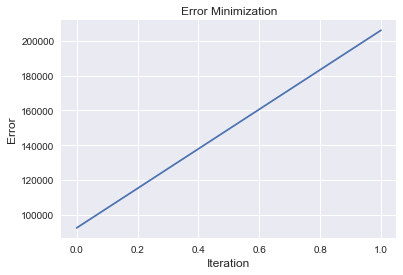

Iterations = 1
Cost Function Value = 205986.33789
a = 4.57815163594 and b = -11.4690521113


In [6]:
cost, a, b = run_gradient_descent(5, 10, data['x'], data['y'], 0.001, 0.01, plot=True, verbose=True)

In only 28 iterations our code returned a value for $a = 4.83105523067$ and $b = 1.38735918763$. Let's test it against the stabilished scipy.stats module, but firts take a look on how our regression line looks like:

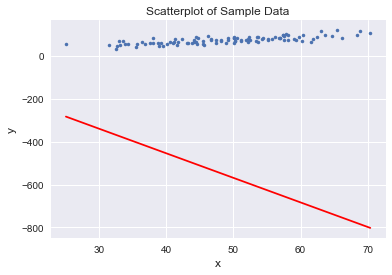

In [7]:
y_model = [(a + b * x) for x in data['x']]

plt.plot(data['x'], data['y'], '.')
plt.plot(data['x'], y_model, '-', color='r') 
plt.title('Scatterplot of Sample Data')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.show()

In [8]:
# Test of scipy linear regression for the same dataset
x = [x for x in data['x']]
y = [y for y in data['y']]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('a = ' + str(intercept) + 'and b = ' + str(slope))

a = 7.99102098227and b = 1.32243102276


We can see that the value of $b$ is not so distant from the value we find with our algorithm but the value of $a$ is very different. That's the problem I'm trying to solve at the moment (StackOverflow question here: https://stackoverflow.com/questions/48688515/gradient-descent-algorithm-for-linear-regression-do-not-optmize-the-y-intercept/48689590?noredirect=1#comment84400272_48689590).

What I noticed is that if I change the value of the initial guess for $a$ the algorithm makes little variation in this value and tries to adjust the value of $b$ to meet the low value for the cost function J.

Take a look:

Iterations = 1
Cost Function Value = 293684.565042
a = 89.4931516359 and b = -15.6305111355


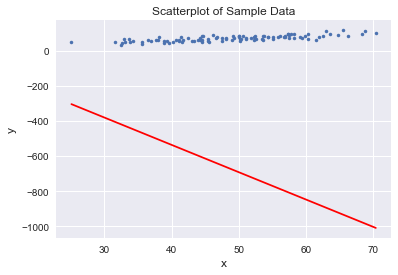

In [9]:
cost, a, b = run_gradient_descent(90, 10, data['x'], data['y'], 0.001, 0.01, verbose=True)

y_model = [(a + b * x) for x in data['x']]

plt.plot(data['x'], data['y'], '.')
plt.plot(data['x'], y_model, '-', color='r') 
plt.title('Scatterplot of Sample Data')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.show()

The test above is an exagerated guess and we can see that it returns an absurd value of $b < 0$. Clearly our model can't have a negative slope. Another thing I noticed is that if I choose the initial value for $a$ close to the value scipy.stats returns the value for the cost function J will be smaller.

Iterations = 28
Cost Function Value = 55.1387416341
a = 7.97950652138 and b = 1.32549759405


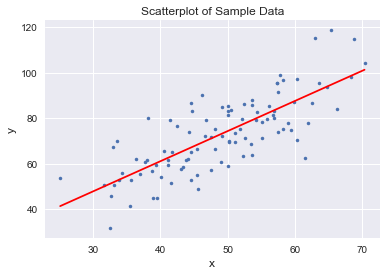

In [10]:
cost, a, b = run_gradient_descent(8.15, 10, data['x'], data['y'], 0.0001, 0.01, verbose=True)

y_model = [(a + b * x) for x in data['x']]

plt.plot(data['x'], data['y'], '.')
plt.plot(data['x'], y_model, '-', color='r') 
plt.title('Scatterplot of Sample Data')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.show()

### Defining a Search Range for y-intercept

To solve the problem of the initial guess for $a$ I came up with a function to define an initial search range where the run_gradient_descent will try to find the best value for it, optimizing the result.

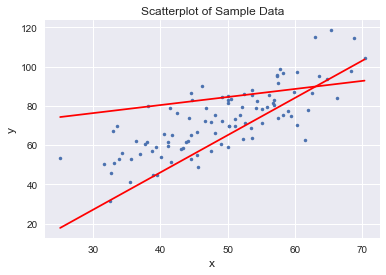

(-30, 64)

In [11]:
def search_range(x, y, plot=False):
    '''
    Given a dataset with points (x, y) searches for a best guess for initial
    values of 'a'.
    '''
    data_lenght = len(x)             # Total size of of the dataset
    q_lenght = int(data_lenght / 4)  # Size of a quartile of the dataset
    
    # Finding the max and min value for y in the first quartile
    min_Q1 = (x[0], y[0])
    max_Q1 = (x[0], y[0])
    
    for i in range(q_lenght):
        temp_point = (x[i], y[i])
        if temp_point[1] < min_Q1[1]:
            min_Q1 = temp_point
        if temp_point[1] > max_Q1[1]:
            max_Q1 = temp_point
    
    # Finding the max and min value for y in the 4th quartile
    min_Q4 = (x[data_lenght - 1], y[data_lenght - 1])
    max_Q4 = (x[data_lenght - 1], y[data_lenght - 1])
    
    for i in range(data_lenght - 1, data_lenght - q_lenght, -1):
        temp_point = (x[i], y[i])
        if temp_point[1] < min_Q4[1]:
            min_Q4 = temp_point
        if temp_point[1] > max_Q4[1]:
            max_Q4 = temp_point
            
    mean_Q4 = (((min_Q4[0] + max_Q4[0]) / 2), ((min_Q4[1] + max_Q4[1]) / 2))
            
    # Finding max_y and min_y given the points found above
    # Two lines need to be defined, L1 and L2.
    # L1 will pass through min_Q1 and mean_Q4
    # L2 will pass through max_Q1 and mean_Q4
    
    # Calculatin slope for L1 and L2 given m = Delta(y) / Delta (x)
    slope_L1 = (min_Q1[1] - mean_Q4[1]) / (min_Q1[0] - mean_Q4[0])
    slope_L2 = (max_Q1[1] - mean_Q4[1]) / (max_Q1[0] -mean_Q4[0])
    
    # Calculating y-intercepts for L1 and L2 given line equation in the form y = mx + b
    # Float numbers are converted to int because they will be used as range for iteration
    y_L1 = int(min_Q1[1] - min_Q1[0] * slope_L1)
    y_L2 = int(max_Q1[1] - max_Q1[0] * slope_L2)
    
    
    # Ploting L1 and L2
    if plot:
        L1 = [(y_L1 + slope_L1 * x) for x in data['x']]
        L2 = [(y_L2 + slope_L2 * x) for x in data['x']]

        plt.plot(data['x'], data['y'], '.')
        plt.plot(data['x'], L1, '-', color='r') 
        plt.plot(data['x'], L2, '-', color='r') 
        plt.title('Scatterplot of Sample Data')
        plt.xlabel('x',fontsize=12)
        plt.ylabel('y',fontsize=12)
        plt.show()
    
    return y_L1, y_L2

search_range(data['x'], data['y'], plot=True)

In [12]:
def run_search_gradient_descent(x_values, y_values, alpha, precision, verbose=False):
    '''
    Runs the gradient_descent_step function and updates (a,b) until
    the value of the cost function varies less than 'precision'.

    x_values, y_values: points (x,y) of the dataset
    alpha: learning rate for the algorithm
    precision: value for the algorithm to stop calculation
    '''    
    from math import inf
    
    a1, a2 = search_range(x_values, y_values)
    
    best_guess = [inf, 0, 0]
    
    for a in range(a1, a2):
        
        cost, linear_coef, slope = run_gradient_descent(a, 0, x_values, y_values, alpha, precision)
                    
        # Saving value for cost_function and parameters (a,b)        
        if cost < best_guess[0]:
            best_guess = [cost, linear_coef, slope]
    if verbose:        
        print('Cost Function = ' + str(best_guess[0]))
        print('a = ' + str(best_guess[1]) + ' and b = ' + str(best_guess[2]))

    return (best_guess[0], best_guess[1], best_guess[2])

In [13]:
# _, a, b = run_search_gradient_descent(data['x'], data['y'], 0.0001, 0.001, verbose=True)

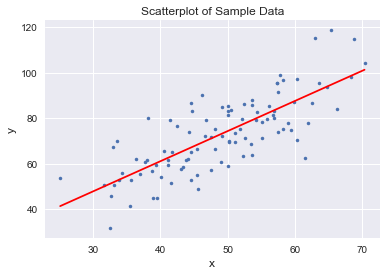

In [14]:
# Plot of the linear regression with the last values for a and b
y_model = [(a + b * x) for x in data['x']]

plt.plot(data['x'], data['y'], '.')
plt.plot(data['x'], y_model, '-', color='r') 
plt.title('Scatterplot of Sample Data')
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.show()

The code above returned a much better value of $a = 8.0259125043065893$. The speed of the algorithm is not good (it's very bad indeed), but it gave me a reasonable result. I think there are improvements to be made but this is a task for another time.

## Vector Implementation of the Gradient Descent Algorithm

The code above runs well but there is a much faster implementation that uses matrix math to speed things up.

Here we split the data in two, X and y, and then we add a column of 1's to the X data. After this we can transform the data to two Numpy arrays to deal with the fast matrix math.

In [15]:
# Filtering data in two separated datframes and adding a column of 'ones' to the X dataframe
X = data.filter(['x'], axis=1)
X['intercept'] = 1

y = data.filter(['y'])

# Transforming to Numpy arrays to easier matrix math
X = np.array(X)
y = np.array(y).flatten()

I had to get back to some linear algebra to understand why to add 1's to the X data.

When you're dealing with the vector implementation you need to be aware that you will have two vectors for each sample in your data set:

$x = [x_n , 1]$ and $\theta = [b , a]$

The dot product of these two vectors will be your hipothesis for that given sample in the dataset given the parameters $a$ and $b$ in the vector $\theta$:

$h(\theta) = x \cdot \theta = x_n \times b + 1 \times a$

Do you recognize this equation? If you subtract the actual $y$ value of it you get the difference between the actual $y-value$ and the value calculated with the parameters you've chosen.

If you square this difference, sum up all the obtained values for all points in your dataset and divide it by $1/(2m)$, where m is the size of your dataset you will get the value for the cost function for the given parameters you choose. Take a look at the code and you'll understand.

In [16]:
# Defining 'thetha' as initial parameter [b, a]
theta = np.array([1, 2])

def cost_function(X, y, theta):
    ## number of training examples
    m = len(y)

    ## Calculate the cost with the given parameters
    J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    return J

cost_function(X, y, theta)

297.12960680185449

Now we can implement the Gradient Descent algorithm!

First we can calculate the hipothesis with given values for $a$ and $b$ using the vector dot product of $X$ and $\theta$. Our friend Numpy do a grat job here... we don't need and for loop to iterate over all our dataset. Our $X$ data is in the form

$$X = [[x_1, 1], [x_2, 1], ... , [x_n, 1]]$$

and the using the X.dot(theta) will give us the $h$ vector of the same size of our dataset with each value being a $y-estimate$ for our model.

Then we need to calculate the error, simply doing a vector subtraction $error = h - y$, and we come up with the errors for each point in our dataset.

With the error we can calculate the gradient vector, which gives us the direction to walk to the minima of the cost function.

Let's see the math here...

The X matrix has the shape $[m \times 2]$ and the error vector has the shape $[m \times 1]$. The result of the dot product of between $X^T$ and $error$ is the gradient vector with shape $[2 \times 1]$.

With the gradient vector and the learning rate $\alpha$ it's possible to update the parameters $\theta$ with the equation

$$\theta := \theta - \alpha \times \nabla$$

Repeating the calculations until convergence gives us the values for $a$ and $b$.

In [17]:
def gradient_descent(X, y, theta, alpha, precision=0.001):
    '''
    X -> 
    y ->
    thetha -> initial guess for parameters
    alpha ->
    precision ->
    '''
    
    delta_cost = cost_function(X, y, theta)
    iterations = 0
    
    while delta_cost > precision:
        # Length of the dataset
        m = len(y)
        
        # Calculates the cost before updating parameters thetha
        previous_cost = cost_function(X, y, theta)
        
        # Updating the parameters thetha
        h = X.dot(theta)
        error = h - y
        gradient = X.T.dot(error) / m
        theta = theta - alpha * gradient
        
        # Calculating new cost with updated parameters
        actual_cost = cost_function(X, y, theta)
        delta_cost = previous_cost - actual_cost
        iterations += 1

    return actual_cost, theta, iterations

gradient_descent(X, y, theta, 0.0001) 

(55.804956916009118, array([ 1.43919927,  2.00912919]), 22)

Again, we have the same problem of not reaching a good value for the $a$ parameter. Here we will use the search_range() function to come up with a best initial guess and then run the vectorized gradient descent algorithm.

In [18]:
def run_search_gradient_descent(X, y, alpha, precision, verbose=False):
    '''
    Runs the gradient_descent_step function and updates (a,b) until
    the value of the cost function varies less than 'precision'.

    x_values, y_values: points (x,y) of the dataset
    alpha: learning rate for the algorithm
    precision: value for the algorithm to stop calculation
    '''    
    from math import inf
    
    x_values = np.fromiter((i[0] for i in X), float)
    
    a1, a2 = search_range(x_values, y)
    
    best_guess = [inf, 0, 0]
    
    for a in range(a1, a2):
        
        cost, parameters, iterations = gradient_descent(X, y, np.array([0, a]), alpha, precision)
                    
        # Saving value for cost_function and parameters (a,b)        
        if cost < best_guess[0]:
            best_guess = [cost, parameters, iterations]
    if verbose:        
        print('Cost Function = ' + str(best_guess[0]))
        print('a = ' + str(best_guess[1][1]) + ' and b = ' + str(best_guess[1][0]))

    return (best_guess[0], best_guess[1], best_guess[2])

In [27]:
run_search_gradient_descent(X, y, 0.0001, 0.01, True)

Cost Function = 55.1416024005
a = 8.02591250431 and b = 1.31852848839


(55.141602400450942, array([ 1.31852849,  8.0259125 ]), 21)

We reached a very close values for $a$ and $b$ as before with the for_loop implementation of the gradient descent algorithm but in a much more efficient way. Also, with this implementation we can easily adapt the gradient descent for a higher number of features in the model.

In [28]:
# Solving with the Normal Equation
from numpy.linalg import inv
(inv(X.T.dot(X)).dot(X.T)).dot(y)

array([ 1.32243102,  7.99102098])

In [34]:
# # Feature Scaling

# # Filtering data in two separated datframes and adding a column of 'ones' to the X dataframe
# X_scaled = data.filter(['x'], axis=1)
# X_scaled = (X_scaled - X_scaled.mean()) / np.std(X_scaled)
# X_scaled['intercept'] = 1
# X_scaled = np.array(X_scaled)

# run_search_gradient_descent(X_scaled, y, 0.0001, 0.01, True)

Cost Function = 105.11133224
a = 78.5901644915 and b = 4.71980776048


(105.11133223962203, array([  4.71980776,  78.59016449]), 4589)